In [15]:
#Regularization Parameter:
Lambda = 0.0001

In [16]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [17]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 3
        self.outputLayerSize = 1
        self.hiddenLayerSize = 4
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [18]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [19]:
NN = Neural_Network(Lambda=0.0001)

In [20]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [21]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

6.426229043198855e-10

In [22]:
T = trainer(NN)

In [23]:
T.train(X,y,testX,testY)

         Current function value: 0.016790
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105


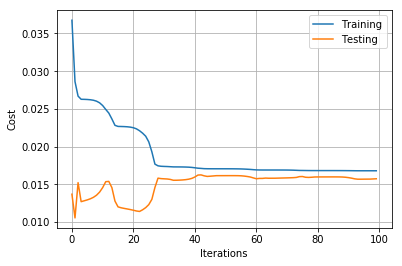

In [24]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [25]:
T.J

[array([0.03675237]),
 array([0.02861511]),
 array([0.02668899]),
 array([0.02627192]),
 array([0.02626189]),
 array([0.02624327]),
 array([0.02620821]),
 array([0.02614231]),
 array([0.02602034]),
 array([0.02580229]),
 array([0.02544019]),
 array([0.02492732]),
 array([0.02443837]),
 array([0.02366254]),
 array([0.02281589]),
 array([0.02267237]),
 array([0.02266124]),
 array([0.02264774]),
 array([0.02262357]),
 array([0.022579]),
 array([0.02249651]),
 array([0.02234707]),
 array([0.02209743]),
 array([0.02177358]),
 array([0.02137303]),
 array([0.02062433]),
 array([0.01931046]),
 array([0.01767059]),
 array([0.01744556]),
 array([0.01738647]),
 array([0.01736599]),
 array([0.01735179]),
 array([0.01732837]),
 array([0.01730455]),
 array([0.01730219]),
 array([0.01729936]),
 array([0.01729422]),
 array([0.01728473]),
 array([0.01726734]),
 array([0.01723652]),
 array([0.01718666]),
 array([0.01713152]),
 array([0.01710408]),
 array([0.01706982]),
 array([0.01705968]),
 array([0.01

In [26]:
T.testJ

[array([0.01368291]),
 array([0.01053803]),
 array([0.01521578]),
 array([0.01269313]),
 array([0.01280986]),
 array([0.0129297]),
 array([0.013075]),
 array([0.01327031]),
 array([0.01354898]),
 array([0.01395853]),
 array([0.01455807]),
 array([0.01534313]),
 array([0.0153782]),
 array([0.01455694]),
 array([0.01277089]),
 array([0.01200351]),
 array([0.01188299]),
 array([0.01180003]),
 array([0.01172479]),
 array([0.01164557]),
 array([0.01155492]),
 array([0.01145567]),
 array([0.01139599]),
 array([0.01161644]),
 array([0.01190316]),
 array([0.01230038]),
 array([0.01299815]),
 array([0.0145773]),
 array([0.0158097]),
 array([0.01574963]),
 array([0.01572295]),
 array([0.01570031]),
 array([0.01564318]),
 array([0.01553048]),
 array([0.01553388]),
 array([0.01554934]),
 array([0.01557404]),
 array([0.01561243]),
 array([0.01567481]),
 array([0.01578055]),
 array([0.01596495]),
 array([0.016222]),
 array([0.01624356]),
 array([0.01612084]),
 array([0.01604219]),
 array([0.01607063

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.00394274358138253

In [28]:
yHat=NN.forward(X)

In [29]:
yHat

array([[0.53664972],
       [0.38911162],
       [0.37727678],
       [0.4710561 ],
       [0.46589346],
       [0.47547807],
       [0.47898247],
       [0.67804606],
       [0.60393152],
       [0.52633172],
       [0.39372792],
       [0.50778306],
       [0.43779032],
       [0.40561121],
       [0.51593526],
       [0.44403083],
       [0.4744794 ],
       [0.43479449],
       [0.31840496],
       [0.48150567],
       [0.46514195],
       [0.47585652],
       [0.54682028],
       [0.48792819],
       [0.5529827 ],
       [0.53685791],
       [0.63421449],
       [0.52280244],
       [0.54574   ],
       [0.44660371],
       [0.59947194],
       [0.6553351 ],
       [0.66259996],
       [0.67599203],
       [0.63298897],
       [0.59584377],
       [0.65345643],
       [0.64967211],
       [0.72422041],
       [0.69724738],
       [0.73058438],
       [0.66003994],
       [0.80344217],
       [0.81458468],
       [0.79256741],
       [0.7883057 ],
       [0.71951806],
       [0.689

In [30]:
y

array([[0.26372911],
       [0.3349176 ],
       [0.52901287],
       [0.46778898],
       [0.58859326],
       [0.28650113],
       [0.47320807],
       [0.45271621],
       [0.38367462],
       [0.23399813],
       [0.35317372],
       [0.14062986],
       [0.26372911],
       [0.33746428],
       [0.28799656],
       [0.50986837],
       [0.50986837],
       [0.        ],
       [0.47639142],
       [0.44976976],
       [0.46613068],
       [0.5882231 ],
       [0.63635825],
       [0.57313552],
       [0.45643258],
       [0.76222627],
       [0.55359126],
       [0.71115948],
       [0.31546218],
       [0.60413983],
       [0.83761975],
       [0.7476273 ],
       [0.84718459],
       [0.85934053],
       [0.78972149],
       [0.74365922],
       [0.68135448],
       [0.89668192],
       [0.73519004],
       [0.98720739],
       [0.50502673],
       [1.        ],
       [0.93787293],
       [0.80331364],
       [0.94438769],
       [0.78782629],
       [0.70467434],
       [0.651

In [ ]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

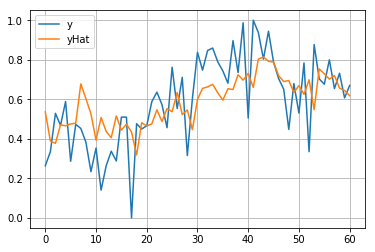

In [31]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [32]:
prediksi=NN.forward(dataprediksi)

In [33]:
prediksi

array([[0.77970183],
       [0.81617589],
       [0.6958456 ],
       [0.50457072]])

In [34]:
from sklearn.metrics import mean_squared_error 

In [35]:
Y_true= ([	0.67	]	,
[	0.389745184	]	,
[	0.136735812	]	,
[	0.366973156	]	,

)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.1313536210942686

In [36]:
dataprediksi

array([[0.38732394, 0.79538041, 0.67      ],
       [0.37323944, 1.        , 0.67      ],
       [0.36619718, 0.70768171, 0.38974518],
       [0.44366197, 0.49169532, 0.13673581]])

In [37]:
z=np.array([0.6294	,	0.4578])

In [38]:
y=np.array([	0.366973156250463	])

In [39]:
a=np.concatenate((z,y))

In [40]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.55134826])

In [41]:
#prediksi 2
c=prediksi
z1=np.array([0.6795	,	0.4539])
b=y[1:]
d=np.concatenate((z1,b,c))
prediksi=NN.forward(d)
prediksi

array([0.61145222])

In [42]:
#prediksi 3
c=prediksi
z2=np.array([0.5888	,	0.4545])
b=y[1:]
d=np.concatenate((z2,b,c))
prediksi=NN.forward(d)
prediksi

array([0.64076808])

In [43]:
#prediksi 4
c=prediksi
z3=np.array([0.527	,	0.4555])
b=y[1:]
d=np.concatenate((z3,b,c))
prediksi=NN.forward(d)
prediksi

array([0.65546264])

In [44]:
#prediksi 5
c=prediksi
z4=np.array([0.4745	,	0.4564])
b=y[1:]
d=np.concatenate((z4,b,c))
prediksi=NN.forward(d)
prediksi

array([0.66047207])

In [45]:
#prediksi 6
c=prediksi
z5=np.array([0.4621	,	0.4571])
b=y[1:]
d=np.concatenate((z5,b,c))
prediksi=NN.forward(d)
prediksi

array([0.65359931])